In [1]:
import matplotlib.pyplot as plt
import librosa, librosa.display
import numpy as np
import csv
from scipy.signal import freqz

import pomozne as lib

In [2]:
input_name = "scope5"

In [3]:
audio_path = "./posnetki/" + input_name + ".wav"
osciloscop_path = "./meritve/" + input_name + ".csv"

In [4]:
# branje meritve iz CSV datoteke

file = open(osciloscop_path)
csvreader = csv.reader(file, delimiter=",")

rows = []
times = []
volts = []
count = 0
for row in csvreader:
  if count != 0:
        rows.append(row)
        times.append(float(row[0]))
        volts.append(float(row[1]))
  count += 1

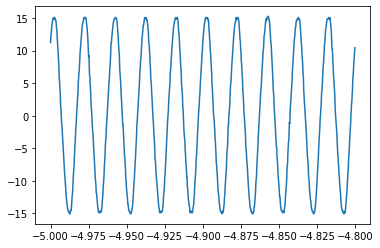

In [5]:
plt.plot(times[0:1000], volts[0:1000])

# Frekvenčna analiza vhodnih podatkov (FFT)

In [6]:
cut_f_min = 40
cut_f_max = 60

**Določitev frekvence vzorčenja**: določena kot frekvenca vzorčenja meritve. Posnetek je temu primerno "resemplan".

In [7]:
SAMPLE_RATE = round(1 / abs(times[1] - times[0]))

## Frekvenčna analiza audio posnetka

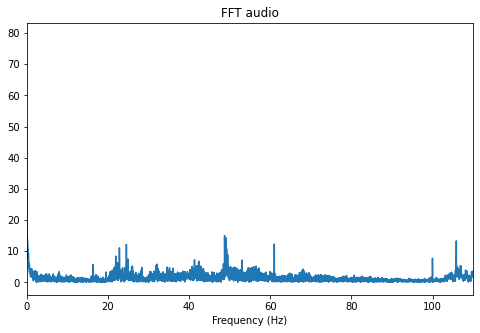

In [8]:
audio, sr = librosa.load(audio_path, sr=SAMPLE_RATE)
X = np.fft.fft(audio)

audio_f, audio_mag = lib.plot_magnitude_spectrum(audio, sr, "FFT audio", 0, 110)
plt.show()

## Frekvenčna analiza meritve

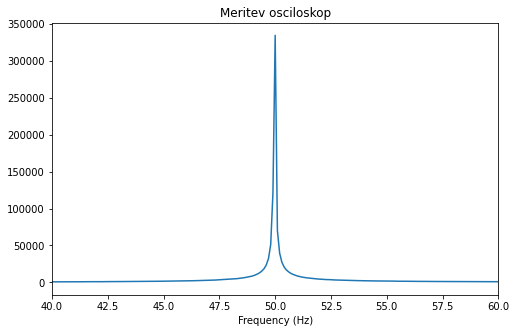

In [9]:
mes_f, mes_mag = lib.plot_magnitude_spectrum(volts, SAMPLE_RATE, "Meritev osciloskop", cut_f_min, cut_f_max)

# Spektogramska analiza

## Spektogramska analiza posnetka

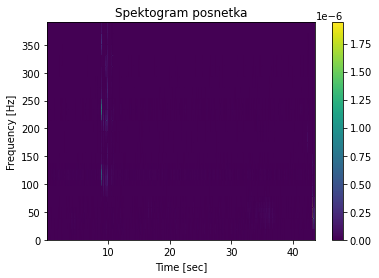

In [10]:
audio_avg = np.average(audio)
audio_x = []
for x in audio:
  audio_x.append(x - audio_avg)
  
lib.specgram(audio, SAMPLE_RATE, title="Spektogram posnetka")

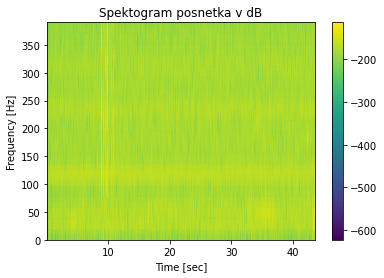

In [11]:
lib.specgram(audio, SAMPLE_RATE, dB = True, title="Spektogram posnetka v dB")


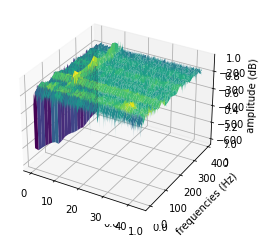

In [12]:
fig2, ax2 = plt.subplots(subplot_kw={'projection': '3d'})
lib.specgram3d(audio, fs=SAMPLE_RATE, dB=True)
plt.show()

## Spektogramska analiza meritve

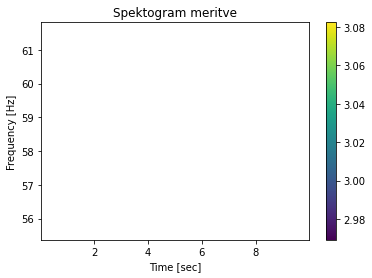

In [13]:
lib.specgram(np.array(volts), SAMPLE_RATE, fmin = cut_f_min, fmax = cut_f_max, title="Spektogram meritve")

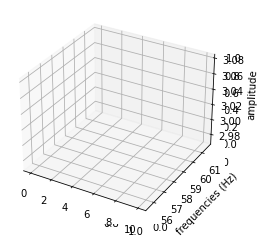

In [14]:
fig2, ax2 = plt.subplots(subplot_kw={'projection': '3d'})
lib.specgram3d(np.array(volts), fs=SAMPLE_RATE, fmin = cut_f_min, fmax = cut_f_max, dB = False)
plt.show()

# Uporaba filtrov

## Izbira filtra in nastavitev filtra

Izberemo *bandpass Butterworth filter*. Z filtrom želimo opraviti filtriranje vseh signalov, ki se ne nahajajo v pasu osnovne frkevnece ENF ali njenih harmonikov, pri čemer dopuščamo tudi frekvence v bližnji okolici.

Iz spodnjega grafa razberemo, da je smiselno izbrati *order = 2*.

In [15]:
fs = 5000.0
lowcut = 500.0
highcut = 1250.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [2, 3, 6, 9]:
  b, a = lib.butter_bandpass(lowcut, highcut, fs, order=order)
  w, h = freqz(b, a, worN=2000)
  plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

AttributeError: module 'pomozne' has no attribute 'butter_bandpass'

<Figure size 432x288 with 0 Axes>

In [ ]:
filter_order = 8

## Uporaba filtra na avdio posnetku

In [ ]:
audio_filter = lib.butter_bandpass_filter(audio, 48, 52, SAMPLE_RATE, order=filter_order)

lib.plot_magnitude_spectrum(audio_filter, SAMPLE_RATE, "Filtriran signal", min=cut_f_min, max=cut_f_max)

In [ ]:
lib.specgram(audio_filter, SAMPLE_RATE, 45, 55)

In [ ]:
plt.plot(audio_filter)

In [ ]:
# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()

for order in [2,7]:
  a = lib.butter_bandpass_filter(audio, 48, 52, SAMPLE_RATE, order=order)
  plt.plot(a, label="order = %d" % order)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')